<a href="https://colab.research.google.com/github/Bindhushree2529/EDA-1/blob/main/EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### About the data set (Detected Cases of Ebola)

This dataset consists of data for countries with an active Ebola outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of ebola reported from Guinea

**Cases_Liberia**: Number of cases of ebola reported from Liberia

**Cases_SierraLeone**: Number of cases of ebola reported from Sierra Leone

**Cases_Nigeria**: Number of cases of ebola reported from Nigeria

**Cases_Senegal**: Number of cases of ebola reported from Senegal

**Cases_UnitedStates**: Number of cases of ebola reported from the United States of America

**Cases_Spain**: Number of cases of ebola reported from Spain

**Cases_Mali**: Number of cases of ebola reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of ebola from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of ebola from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of ebola from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of ebola from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of ebola from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of ebola from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of ebola from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of ebola from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**
6. **[Outlier Detection Techniques](#out)**
7. **[Treatment of Outliers](#odt)**
8. **[Feature Engineering](#fe)**
9. **[Train-Test Split](#split)**

**Import the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#### Load the ebola dataset and display the first five records (Use for section 1, 2)

In [ ]:
# Load the dataset
df = pd.read_csv('/content/ebola.csv')

# Display the first 5 rows of the dataset
print(df.head(5))

   Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
0        2776.0            NaN            10030.0            NaN   
1        2775.0            NaN             9780.0            NaN   
2        2769.0         8166.0             9722.0            NaN   
3           NaN         8157.0                NaN            NaN   
4           NaN            NaN                NaN            NaN   

   Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  Deaths_Guinea  \
0            NaN                 NaN          NaN         NaN         1786.0   
1            NaN                 NaN          NaN         NaN         1781.0   
2            NaN                20.0          NaN         NaN         1767.0   
3            NaN                10.0          NaN         NaN            NaN   
4            NaN                 NaN          NaN         NaN            NaN   

   Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  Deaths_Senegal  \
0             NaN              2977.0

### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Check for rows with all missing values
empty_rows = df.isnull().all(axis=1).sum()

if empty_rows > 0:
    print("There are", empty_rows, "records with no data reported.")
else:
    print("There are no records with no data reported.")


There are 4 records with no data reported.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Find columns with more than 60% missing values
columns_with_many_missing = missing_percentage[missing_percentage > 60].index.tolist()

# Print the result
print("Columns with more than 60% missing values:", columns_with_many_missing)

Columns with more than 60% missing values: ['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali', 'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali']


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with ebola outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Calculate the percentage of missing values for the first four countries
missing_percentage_first_four = df[['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_Nigeria']].isnull().mean() * 100

# Find the country with the highest percentage of missing values
country_to_consider = missing_percentage_first_four.idxmax()

# Print the result
print("The country to consider first is:", country_to_consider)


The country to consider first is: Cases_Nigeria


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
pip install missingno

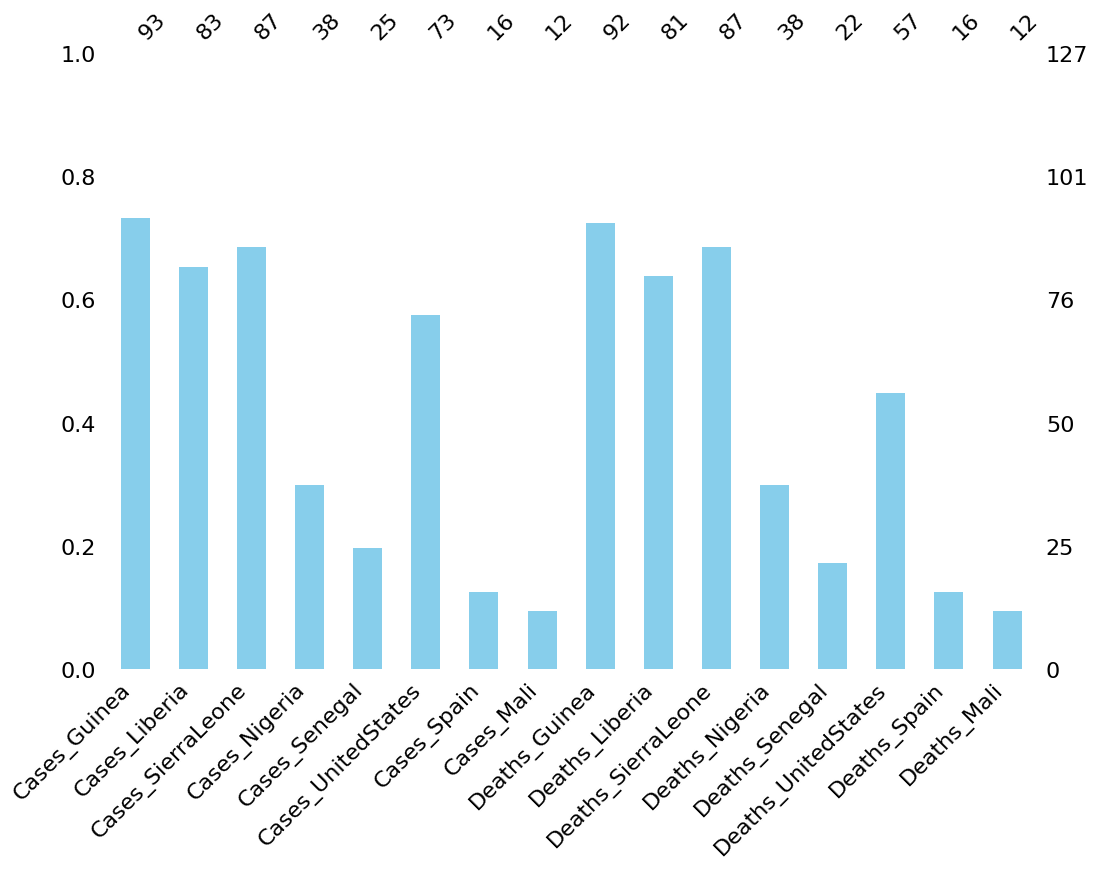

<Figure size 1200x800 with 0 Axes>

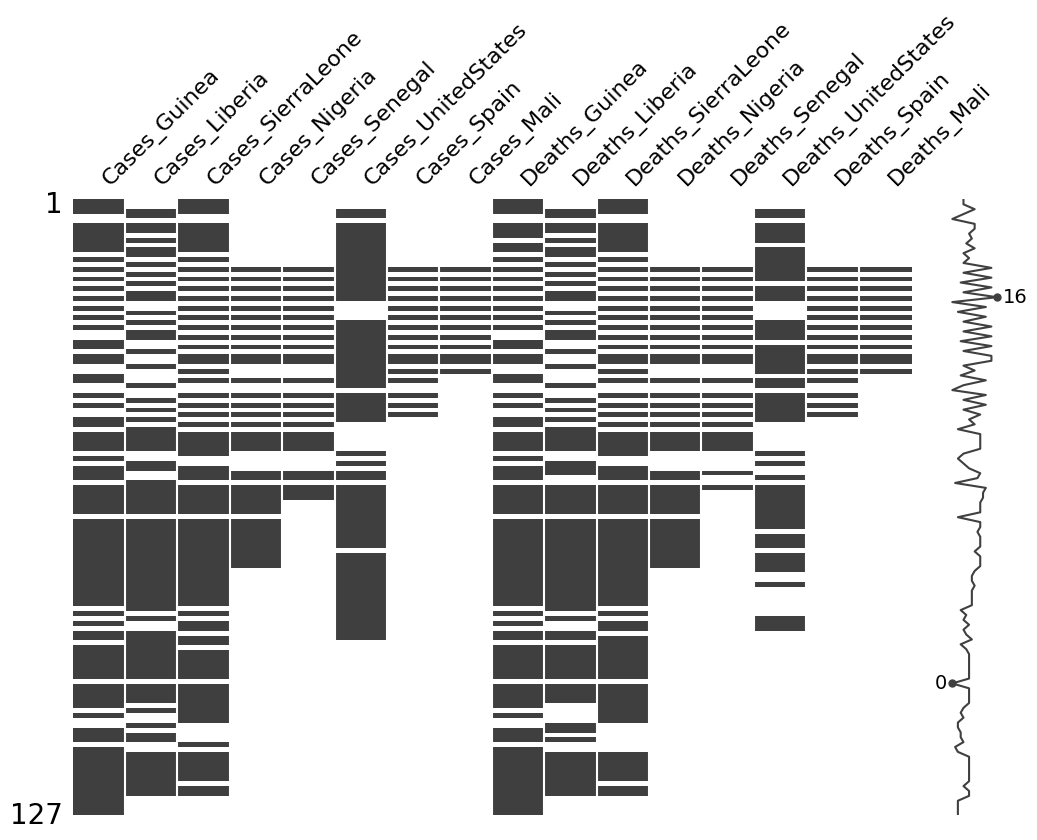

<Figure size 1200x800 with 0 Axes>

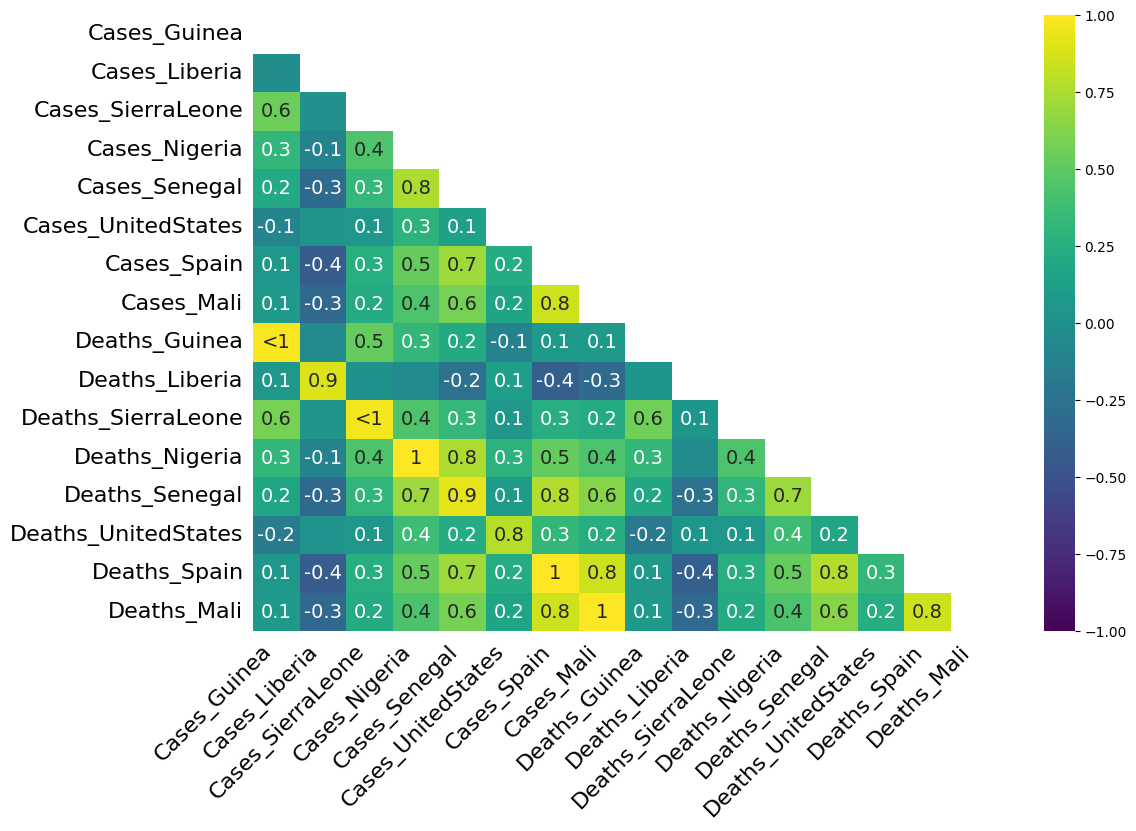

In [ ]:
import missingno as msno
# Visualize missing values
plt.figure(figsize=(12, 8))

# Bar chart to visualize the missing values
msno.bar(df, figsize=(12, 8), color="skyblue")

# Matrix plot to visualize the missing values
plt.figure(figsize=(12, 8))
msno.matrix(df, figsize=(12, 8), sparkline=True)

# Heatmap to visualize the correlation of missing values
plt.figure(figsize=(12, 8))
msno.heatmap(df, figsize=(12, 8), cmap="viridis")

# Show the plots
plt.show()


<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Count non-missing values in each row
non_missing_counts = df.count(axis=1)

# Filter rows with more than two non-missing values
df_filtered = df[non_missing_counts > 2]

# Display the filtered DataFrame
print(df_filtered)


     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
0          2776.0            NaN            10030.0            NaN   
1          2775.0            NaN             9780.0            NaN   
2          2769.0         8166.0             9722.0            NaN   
3             NaN         8157.0                NaN            NaN   
5          2730.0         8115.0             9633.0            NaN   
..            ...            ...                ...            ...   
118         127.0            8.0                2.0            NaN   
119         122.0            8.0                2.0            NaN   
120         112.0            7.0                NaN            NaN   
121         112.0            3.0                2.0            NaN   
122         103.0            8.0                6.0            NaN   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0              NaN                 NaN          NaN         NaN   
1              NaN       

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Drop columns with more than 60% missing values
df_dropped = df.drop(columns=columns_with_many_missing)

# Display the DataFrame after dropping columns
print(df_dropped)


     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_UnitedStates  \
0          2776.0            NaN            10030.0                 NaN   
1          2775.0            NaN             9780.0                 NaN   
2          2769.0         8166.0             9722.0                20.0   
3             NaN         8157.0                NaN                10.0   
4             NaN            NaN                NaN                 NaN   
..            ...            ...                ...                 ...   
122         103.0            8.0                6.0                 NaN   
123          86.0            NaN                NaN                 NaN   
124          86.0            NaN                NaN                 NaN   
125          86.0            NaN                NaN                 NaN   
126          49.0            NaN                NaN                 NaN   

     Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_UnitedStates  
0           1786.0   

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Fill missing values in 'Cases_Liberia' with the mean
df['Cases_Liberia'].fillna(df['Cases_Liberia'].mean(), inplace=True)

# Display the DataFrame after filling missing values
print(df)


     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
0          2776.0    2335.337349            10030.0            NaN   
1          2775.0    2335.337349             9780.0            NaN   
2          2769.0    8166.000000             9722.0            NaN   
3             NaN    8157.000000                NaN            NaN   
4             NaN    2335.337349                NaN            NaN   
..            ...            ...                ...            ...   
122         103.0       8.000000                6.0            NaN   
123          86.0    2335.337349                NaN            NaN   
124          86.0    2335.337349                NaN            NaN   
125          86.0    2335.337349                NaN            NaN   
126          49.0    2335.337349                NaN            NaN   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0              NaN                 NaN          NaN         NaN   
1              NaN       

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of ebola from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Fill missing values in 'Cases_UnitedStates' with a constant value (e.g., 0)
df['Cases_UnitedStates'].fillna(0, inplace=True)

# Display the DataFrame after filling missing values
print(df)


     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
0          2776.0    2335.337349            10030.0            NaN   
1          2775.0    2335.337349             9780.0            NaN   
2          2769.0    8166.000000             9722.0            NaN   
3             NaN    8157.000000                NaN            NaN   
4             NaN    2335.337349                NaN            NaN   
..            ...            ...                ...            ...   
122         103.0       8.000000                6.0            NaN   
123          86.0    2335.337349                NaN            NaN   
124          86.0    2335.337349                NaN            NaN   
125          86.0    2335.337349                NaN            NaN   
126          49.0    2335.337349                NaN            NaN   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0              NaN                 0.0          NaN         NaN   
1              NaN       

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Forward fill missing values in 'Cases_Guinea'
df['Cases_Guinea'].fillna(method='ffill', inplace=True)

# Display the DataFrame after filling missing values
print(df)


     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
0          2776.0    2335.337349            10030.0            NaN   
1          2775.0    2335.337349             9780.0            NaN   
2          2769.0    8166.000000             9722.0            NaN   
3          2769.0    8157.000000                NaN            NaN   
4          2769.0    2335.337349                NaN            NaN   
..            ...            ...                ...            ...   
122         103.0       8.000000                6.0            NaN   
123          86.0    2335.337349                NaN            NaN   
124          86.0    2335.337349                NaN            NaN   
125          86.0    2335.337349                NaN            NaN   
126          49.0    2335.337349                NaN            NaN   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0              NaN                 0.0          NaN         NaN   
1              NaN       

## For new few questions , we shall consider the following dataset.

### About the dataset (Insurance Data)

The dataset contains information about 1338 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on.

Attribute Information:

**age**: Age of the individual

**sex**: Gender of the individual

**bmi**: Body mass index of the individual

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**charges**: Individual's medical costs billed by the insurance company

#### Load the house dataset and display the first five records (Use for section 3 to 6)

#### Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Load the iris dataset and print the first five observations

In [ ]:
# Load the dataset
df = pd.read_csv('/content/insurance.csv')

# Display the first 5 rows of the dataset
print(df.head(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Create a dummy variable for each category in 'region'
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
import pandas as pd
# Create dummy variables for 'region'
region_dummies = pd.get_dummies(df['region'], prefix='region')

# Concatenate dummy variables with the original DataFrame
df = pd.concat([df, region_dummies], axis=1)

# Drop the original 'region' column
df = df.drop('region', axis=1)

# Display the DataFrame with dummy variables
print(df)


      age     sex     bmi  children smoker      charges  region_northeast  \
0      19  female  27.900         0    yes  16884.92400             False   
1      18    male  33.770         1     no   1725.55230             False   
2      28    male  33.000         3     no   4449.46200             False   
3      33    male  22.705         0     no  21984.47061             False   
4      32    male  28.880         0     no   3866.85520             False   
...   ...     ...     ...       ...    ...          ...               ...   
1333   50    male  30.970         3     no  10600.54830             False   
1334   18  female  31.920         0     no   2205.98080              True   
1335   18  female  36.850         0     no   1629.83350             False   
1336   21  female  25.800         0     no   2007.94500             False   
1337   61  female  29.070         0    yes  29141.36030             False   

      region_northwest  region_southeast  region_southwest  
0             

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit the encoder to the 'smoker' column and transform it
df['smoker_label'] = le.fit_transform(df['smoker'])

# Display the DataFrame with the new 'smoker_label' column
print(df)


      age     sex     bmi  children smoker      charges  region_northeast  \
0      19  female  27.900         0    yes  16884.92400             False   
1      18    male  33.770         1     no   1725.55230             False   
2      28    male  33.000         3     no   4449.46200             False   
3      33    male  22.705         0     no  21984.47061             False   
4      32    male  28.880         0     no   3866.85520             False   
...   ...     ...     ...       ...    ...          ...               ...   
1333   50    male  30.970         3     no  10600.54830             False   
1334   18  female  31.920         0     no   2205.98080              True   
1335   18  female  36.850         0     no   1629.83350             False   
1336   21  female  25.800         0     no   2007.94500             False   
1337   61  female  29.070         0    yes  29141.36030             False   

      region_northwest  region_southeast  region_southwest  smoker_label  


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Calculate the frequency of each gender
gender_counts = df['sex'].value_counts()

# Map the gender counts to a new column 'gender_frequency'
df['gender_frequency'] = df['sex'].map(gender_counts)

# Display the DataFrame with the new 'gender_frequency' column
print(df)


      age     sex     bmi  children smoker      charges  region_northeast  \
0      19  female  27.900         0    yes  16884.92400             False   
1      18    male  33.770         1     no   1725.55230             False   
2      28    male  33.000         3     no   4449.46200             False   
3      33    male  22.705         0     no  21984.47061             False   
4      32    male  28.880         0     no   3866.85520             False   
...   ...     ...     ...       ...    ...          ...               ...   
1333   50    male  30.970         3     no  10600.54830             False   
1334   18  female  31.920         0     no   2205.98080              True   
1335   18  female  36.850         0     no   1629.83350             False   
1336   21  female  25.800         0     no   2007.94500             False   
1337   61  female  29.070         0    yes  29141.36030             False   

      region_northwest  region_southeast  region_southwest  smoker_label  \

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Map 'yes' to 1 and 'no' to 0 in the 'smoker' column
df['smoker_binary'] = df['smoker'].map({'yes': 1, 'no': 0})

# Display the DataFrame with the new 'smoker_binary' column
print(df)


      age     sex     bmi  children smoker      charges  region_northeast  \
0      19  female  27.900         0    yes  16884.92400             False   
1      18    male  33.770         1     no   1725.55230             False   
2      28    male  33.000         3     no   4449.46200             False   
3      33    male  22.705         0     no  21984.47061             False   
4      32    male  28.880         0     no   3866.85520             False   
...   ...     ...     ...       ...    ...          ...               ...   
1333   50    male  30.970         3     no  10600.54830             False   
1334   18  female  31.920         0     no   2205.98080              True   
1335   18  female  36.850         0     no   1629.83350             False   
1336   21  female  25.800         0     no   2007.94500             False   
1337   61  female  29.070         0    yes  29141.36030             False   

      region_northwest  region_southeast  region_southwest  smoker_label  \

<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Calculate the mean and standard deviation of 'bmi'
bmi_mean = df['bmi'].mean()
bmi_std = df['bmi'].std()

# Standardize 'bmi' to have mean 0 and variance 1
df['bmi_standardized'] = (df['bmi'] - bmi_mean) / bmi_std

# Display the DataFrame with the standardized 'bmi' column
print(df)


      age     sex     bmi  children smoker      charges  region_northeast  \
0      19  female  27.900         0    yes  16884.92400             False   
1      18    male  33.770         1     no   1725.55230             False   
2      28    male  33.000         3     no   4449.46200             False   
3      33    male  22.705         0     no  21984.47061             False   
4      32    male  28.880         0     no   3866.85520             False   
...   ...     ...     ...       ...    ...          ...               ...   
1333   50    male  30.970         3     no  10600.54830             False   
1334   18  female  31.920         0     no   2205.98080              True   
1335   18  female  36.850         0     no   1629.83350             False   
1336   21  female  25.800         0     no   2007.94500             False   
1337   61  female  29.070         0    yes  29141.36030             False   

      region_northwest  region_southeast  region_southwest  smoker_label  \

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Calculate the range of 'age'
age_range = df['age'].max() - df['age'].min()

# Normalize 'age' to have a range of 1
df['age_normalized'] = (df['age'] - df['age'].min()) / age_range

# Display the DataFrame with the normalized 'age' column
print(df)


      age     sex     bmi  children smoker      charges  region_northeast  \
0      19  female  27.900         0    yes  16884.92400             False   
1      18    male  33.770         1     no   1725.55230             False   
2      28    male  33.000         3     no   4449.46200             False   
3      33    male  22.705         0     no  21984.47061             False   
4      32    male  28.880         0     no   3866.85520             False   
...   ...     ...     ...       ...    ...          ...               ...   
1333   50    male  30.970         3     no  10600.54830             False   
1334   18  female  31.920         0     no   2205.98080              True   
1335   18  female  36.850         0     no   1629.83350             False   
1336   21  female  25.800         0     no   2007.94500             False   
1337   61  female  29.070         0    yes  29141.36030             False   

      region_northwest  region_southeast  region_southwest  smoker_label  \

<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Check the skewness for 'charges'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Skewness of charges: 1.5158796580240388
Skewness of charges after log transformation: -0.08981728740026822


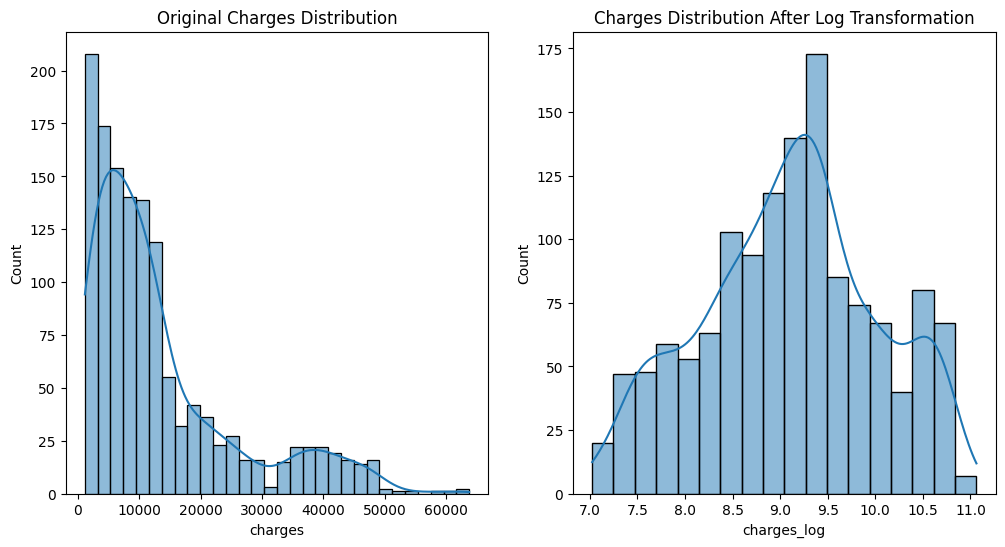

In [ ]:
# Check the skewness of 'charges'
charges_skewness = df['charges'].skew()
print("Skewness of charges:", charges_skewness)

# If the data is skewed, apply a transformation to reduce skewness
if charges_skewness > 1 or charges_skewness < -1:
  # Apply log transformation to reduce right skewness
  df['charges_log'] = np.log1p(df['charges'])
  print("Skewness of charges after log transformation:", df['charges_log'].skew())

  # Visualize the distribution before and after transformation
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  sns.histplot(df['charges'], kde=True)
  plt.title('Original Charges Distribution')
  plt.subplot(1, 2, 2)
  sns.histplot(df['charges_log'], kde=True)
  plt.title('Charges Distribution After Log Transformation')
  plt.show()
else:
  print("Charges data is not highly skewed.")



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform the 'log_charges' values to the original scale and compare the 'charges' and the transformed data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

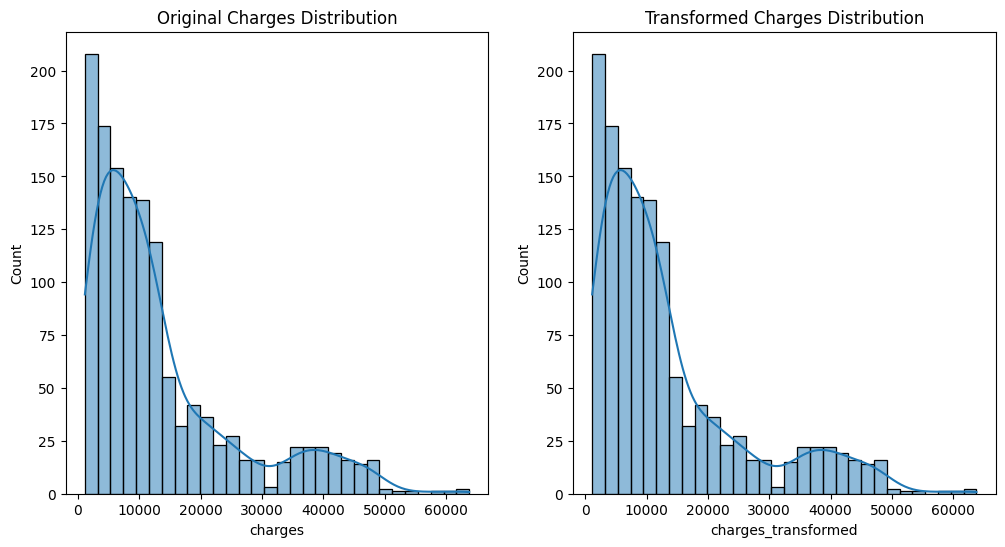

Correlation between original and transformed charges: 1.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Transform 'log_charges' back to the original scale
if 'charges_log' in df.columns:
  df['charges_transformed'] = np.expm1(df['charges_log'])

  # Compare 'charges' and 'charges_transformed'
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  sns.histplot(df['charges'], kde=True)
  plt.title('Original Charges Distribution')
  plt.subplot(1, 2, 2)
  sns.histplot(df['charges_transformed'], kde=True)
  plt.title('Transformed Charges Distribution')
  plt.show()

  # Calculate and print the correlation between 'charges' and 'charges_transformed'
  correlation = df['charges'].corr(df['charges_transformed'])
  print("Correlation between original and transformed charges:", correlation)
else:
  print("No 'log_charges' column found.")


## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the iris dataset and print the first five observations

In [ ]:
# Load the dataset
df = pd.read_csv('/content/house.csv')

# Display the first 5 rows of the dataset
print(df.head(5))

   Rooms Type    Price Method             Regionname  Bathroom  Car  Landsize  \
0      3    h  1490000      S  Northern Metropolitan         1    1       126   
1      3    h  1220000      S  Northern Metropolitan         1    1       202   
2      3    h  1420000      S  Northern Metropolitan         1    0       156   
3      3    h  1515000      S   Western Metropolitan         2    1         0   
4      2    h   670000      S   Western Metropolitan         2    0       134   

   Distance  Bedroom  
0      25.2        2  
1      21.8        2  
2      21.7        2  
3      18.8        3  
4      20.6        3  


#### Load the house dataset and display the first five records (Use for section 6 to 9)

<a id="out"> </a>
## 6. Outlier Detection Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Check for features with unique identifiers or categorical nature
print(df['Type'].unique())
print(df['Method'].unique())
print(df['Regionname'].unique())

# These features might not require outlier treatment as they represent categories or identifiers.


['h' 't' 'u']
['S' 'SP' 'VB' 'PI' 'SA']
['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'South-Eastern Metropolitan' 'Eastern Metropolitan' 'Northern Victoria'
 'Eastern Victoria' 'Western Victoria']


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

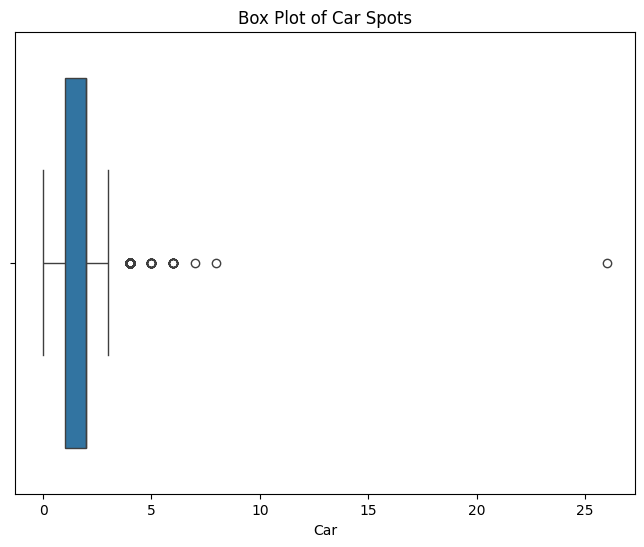

count    4766.000000
mean        1.588754
std         0.971575
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        26.000000
Name: Car, dtype: float64
Outliers using IQR method:
       Rooms Type    Price Method                  Regionname  Bathroom  Car  \
56        3    h  1470000      S       Northern Metropolitan         2    5   
58        3    t   900000      S       Northern Metropolitan         3    4   
117       3    h   770000      S  South-Eastern Metropolitan         2    4   
122       3    t   950000      S        Eastern Metropolitan         4    4   
123       3    t   820000      S        Eastern Metropolitan         3    4   
...     ...  ...      ...    ...                         ...       ...  ...   
4585      3    t   585000      S       Northern Metropolitan         2    4   
4586      2    t   600000      S       Northern Metropolitan         2    4   
4588      4    h   890000      S       Northern Metropolitan       

In [ ]:
# Box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Car'])
plt.title('Box Plot of Car Spots')
plt.show()

# Descriptive statistics to identify potential outliers
print(df['Car'].describe())

# IQR method to detect outliers
Q1 = df['Car'].quantile(0.25)
Q3 = df['Car'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Car'] < lower_bound) | (df['Car'] > upper_bound)]
print("Outliers using IQR method:\n", outliers)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

           Rooms Type    Price Method                  Regionname  Bathroom  \
Type                                                                          
h    25        4    h  2600000     VB       Southern Metropolitan         2   
     27        4    h  2470000     PI       Southern Metropolitan         2   
     39        4    h  3000000      S       Southern Metropolitan         1   
     49        4    h  2975000      S       Southern Metropolitan         1   
     82        7    h  4000000      S  South-Eastern Metropolitan         1   
...          ...  ...      ...    ...                         ...       ...   
u    4487      2    u  2100000     VB       Southern Metropolitan         1   
     4500      3    u  1825000     SP       Northern Metropolitan         1   
     4567      3    u  1362000      S       Southern Metropolitan         2   
     4612      2    u  1300000      S       Southern Metropolitan         2   
     4660      3    u  1550000     VB       Southern

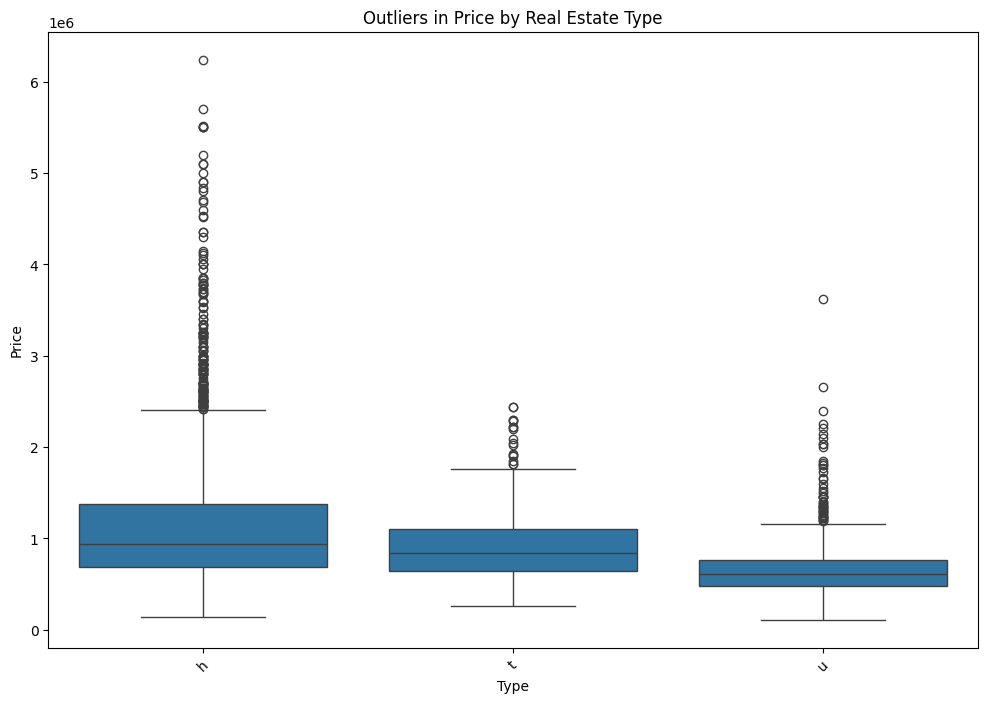

In [ ]:
import matplotlib.pyplot as plt
# Group the data by 'Type' and calculate IQR for 'Price' within each group
grouped = df.groupby('Type')['Price']
Q1 = grouped.quantile(0.25)
Q3 = grouped.quantile(0.75)
IQR = Q3 - Q1

# Define a function to detect outliers within each group
def detect_outliers(group):
  lower_bound = Q1[group.name] - 1.5 * IQR[group.name]
  upper_bound = Q3[group.name] + 1.5 * IQR[group.name]
  return group[(group['Price'] < lower_bound) | (group['Price'] > upper_bound)]

# Apply the outlier detection function to each group
outliers_by_type = df.groupby('Type').apply(detect_outliers)

# Print the outliers for each type
print(outliers_by_type)

# Visualize outliers using box plots for each type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type', y='Price', data=df)
plt.title('Outliers in Price by Real Estate Type')
plt.xticks(rotation=45)
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>21. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Calculate IQR for 'Rooms'
Q1 = df['Rooms'].quantile(0.25)
Q3 = df['Rooms'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for extreme values
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Find extreme values
extreme_values = df[(df['Rooms'] < lower_bound) | (df['Rooms'] > upper_bound)]

# Print extreme values
print("Extreme values for number of rooms:\n", extreme_values)


Extreme values for number of rooms:
 Empty DataFrame
Columns: [Rooms, Type, Price, Method, Regionname, Bathroom, Car, Landsize, Distance, Bedroom]
Index: []


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>22. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# **Z-Score Method:**

# Calculate the z-score for each bathroom value.
df['bathroom_zscore'] = np.abs((df['Bathroom'] - df['Bathroom'].mean()) / df['Bathroom'].std())

# Define a threshold (e.g., 3) and identify values with z-scores exceeding it as outliers.
bathroom_outliers_zscore = df[df['bathroom_zscore'] > 3]
print("Outliers using Z-Score method:\n", bathroom_outliers_zscore)



Outliers using Z-Score method:
       Rooms Type    Price Method                  Regionname  Bathroom  Car  \
103       3    t   385000      S       Northern Metropolitan         7    0   
122       3    t   950000      S        Eastern Metropolitan         4    4   
229       1    u   337000      S  South-Eastern Metropolitan         4    2   
382       3    h   720000      S        Western Metropolitan         5    2   
448       3    h  1116000      S       Southern Metropolitan         5    4   
...     ...  ...      ...    ...                         ...       ...  ...   
4093      2    u   560000     PI       Southern Metropolitan         4    2   
4132      2    u   600000      S       Southern Metropolitan         4    2   
4497      4    h  1730000      S       Southern Metropolitan         4    3   
4681      3    h   870000     VB        Western Metropolitan         4    3   
4719      2    u   780000      S        Eastern Metropolitan         4    2   

      Landsize  Dis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>23. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Calculate IQR for 'Bedroom'
Q1 = df['Bedroom'].quantile(0.25)
Q3 = df['Bedroom'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for extreme values (using 3 * IQR)
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Extract records corresponding to extreme outliers
extreme_outliers_bedroom = df[(df['Bedroom'] < lower_bound) | (df['Bedroom'] > upper_bound)]

# Display the extreme outliers
print("Extreme outliers in bedrooms:\n", extreme_outliers_bedroom)


Extreme outliers in bedrooms:
       Rooms Type   Price Method            Regionname  Bathroom  Car  \
1937      3    h  496000      S  Western Metropolitan         1    1   

      Landsize  Distance  Bedroom  bathroom_zscore Distance_Category  \
1937         0      21.7       30         0.781767               Far   

     distance_category  
1937               Far  


<a id="odt"> </a>
## 7. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>24. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Calculate initial average distance
initial_avg_distance = df['Distance'].mean()

# Calculate IQR for 'Distance'
Q1 = df['Distance'].quantile(0.25)
Q3 = df['Distance'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['Distance'] >= lower_bound) & (df['Distance'] <= upper_bound)]

# Calculate average distance after removing outliers
new_avg_distance = df_no_outliers['Distance'].mean()

# Calculate the change in average distance
change_in_avg_distance = new_avg_distance - initial_avg_distance

# Print the change in average distance
print("Change in average distance after handling outliers:", change_in_avg_distance)


Change in average distance after handling outliers: -0.016921067522901012


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>25. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Calculate IQR for 'Price'
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# For extreme outliers, consider K = 3
K = 3

# Calculate lower and upper bounds for extreme outliers
lower_bound = Q1 - K * IQR
upper_bound = Q3 + K * IQR

print("Range to eliminate extreme outliers for Price: [{}, {}]".format(lower_bound, upper_bound))


Range to eliminate extreme outliers for Price: [-1252750.0, 3117000.0]


<a id="fe"> </a>
## 8. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>26. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Define distance bins
bins = [0, 5, 10, float('inf')]
labels = ['Near', 'Medium', 'Far']

# Create a new feature 'distance_category'
df['distance_category'] = pd.cut(df['Distance'], bins=bins, labels=labels)

# Display the DataFrame with the new feature
print(df[['Distance', 'distance_category']].head())


   Distance distance_category
0      25.2               Far
1      21.8               Far
2      21.7               Far
3      18.8               Far
4      20.6               Far


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>27. Compare the house prices based on the different distance levels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

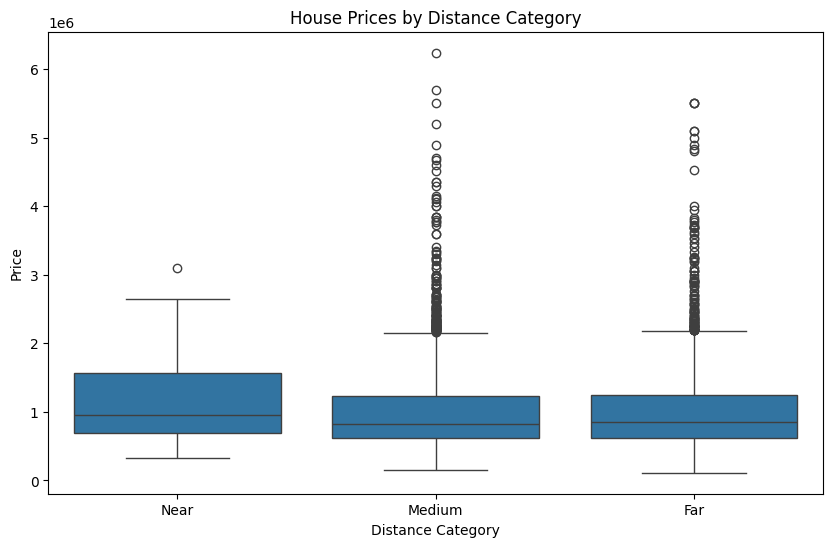

                    count          mean            std       min       25%  \
Distance_Category                                                            
Near                 66.0  1.178102e+06  639472.313975  330000.0  696250.0   
Medium             2651.0  1.009375e+06  621815.243617  145000.0  620000.0   
Far                2049.0  1.027670e+06  637874.538140  112000.0  617000.0   

                        50%        75%        max  
Distance_Category                                  
Near               952000.0  1562500.0  3100000.0  
Medium             825000.0  1235000.0  6240000.0  
Far                850000.0  1250000.0  5510000.0  


In [ ]:
# Categorize houses based on distance
bins = [0, 10, 20, np.inf]
labels = ['Near', 'Medium', 'Far']
df['Distance_Category'] = pd.cut(df['Distance'], bins=bins, labels=labels)

# Compare house prices using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Distance_Category', y='Price', data=df)
plt.title('House Prices by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Price')
plt.show()

# Compare house prices using descriptive statistics
print(df.groupby('Distance_Category')['Price'].describe())


<a id="split"> </a>
## 9. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'Price' is the target variable
y = df['Price']

# Split the data into 80% training and 20% testing
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)  # Set random_state for reproducibility

# Print the shapes of the resulting sets
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of y_train: (3812,)
Shape of y_test: (954,)
